In [29]:
# Thesis:
# 
# "A Bayesian Convolutional Neural Network approach for image-based crack detection and practial maintenace applications" 
# 
# University:
# Erasmus University Rotterdam 
#
# Dowload the publicly availible dataset:" "https://data.mendeley.com/datasets/xnzhj3x8v4/2"
# 
# Make sure you have the following codes saved in the same folder:
#
# CNN; BCNN; CNN_D; Prepare_data
#
# IMPORT THE FOLLOWING PACKAGES:

import numpy as np
import pandas as pd
import tensorflow as tf 

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt 
import random
import cv2
import os
import time
import splitfolders 

# Insert the file directory ".." where you stored the downloaded zip data an check if the input_dir is correct
input_dir = os.path.join("/Users/tasiabueno/Documents/Thesis/Data/Concrete_Crack")
print(input_dir)

/Users/tasiabueno/Documents/Thesis/Data/Concrete_Crack


In [30]:
# Prepare & Load dataset
# Split the data in train-validation-test (70%-15%-15%) data 
# Create for every split an array with images and an array with corresponding labels
# Read the images in to pixel values using the code "create_data" an shuffle the order of the images with code "shuffle_data" for every set
from Prepare_data import create_data,shuffle_data
splitfolders.ratio(input_dir, output ="Data_split", seed = 100, ratio=(0.7,.15,.15), group_prefix= None)
train_dir = "/Users/tasiabueno/Documents/Thesis/Data_split/train" 
test_dir = "/Users/tasiabueno/Documents/Thesis/Data_split/test"
val_dir = "/Users/tasiabueno/Documents/Thesis/Data_split/val"
#
Files_train,Files_test,Files_val =[],[],[]
X_train,X_test,X_val,y_train,y_test,y_val,Train_label,Test_label,Val_label= [],[],[],[],[],[],[],[],[]
# Train
shuffle_data(train_dir,Files_train)
create_data(Files_train,X_train,y_train,Train_label)
# Test
shuffle_data(test_dir,Files_test)
create_data(Files_test,X_test,y_test,Test_label)
# Validation
shuffle_data(val_dir,Files_val)
create_data(Files_val,X_val,y_val,Val_label)

Copying files: 40000 files [00:39, 1014.90 files/s]


In [31]:
# Normalize and reshape and normalize the pixel values to values between 0-1
# Reshape the data 
X_train = np.array(X_train).reshape(-1,100,100,1)
y_train = np.array(y_train)
# Normalize
X_test  = np.array(X_test).reshape(-1,100,100,1)
y_test  = np.array(y_test)
X_val = np.array(X_test).reshape(-1,100,100,1)
y_val  = np.array(y_test)
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255
# One-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
# CHECK
print("Training set:", "IMAGES (X):",X_train.shape[0], "LABELS(y):", y_train.shape[0] ,"\nTest set :" , "IMAGES (X):",X_test.shape[0],"LABELS(y):", y_test.shape[0],"\nValidation set:" , "IMAGES (X):",X_val.shape[0],"LABELS(y):",y_val.shape[0])

Training set: IMAGES (X): 28000 LABELS(y): 28000 
Test set : IMAGES (X): 6000 LABELS(y): 6000 
Validation set: IMAGES (X): 6000 LABELS(y): 6000


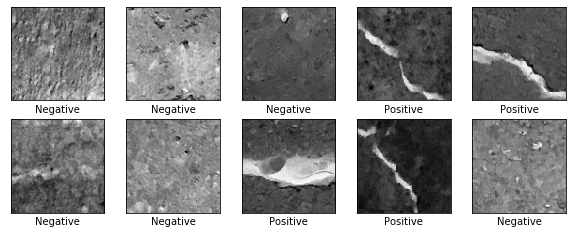

In [6]:
# A random sample of 10 images from the dataset.
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])
    plt.tight_layout(pad=2)
    plt.imshow(X_train.squeeze()[i], cmap=plt.cm.binary)
    plt.xlabel(Train_label[i])
plt.show()

In [20]:
# Import the models from the functions (make sure they are stored in the same folder)
from CNN import LeNet_MM
from CNN_D import LeNet_MM_D
from BCNN import MCDropout, Lenet_MCDropout
#
CNN = LeNet_MM().model
CNN.summary()
CNN_D = LeNet_MM_D().model
CNN_D.summary()
BCNN = Lenet_MCDropout().model
BCNN.summary()
#

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 100, 100, 30)      3030      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 49, 49, 30)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 45, 45, 60)        45060     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 60)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 13, 13, 90)        48690     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 4, 90)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1440)            

In [35]:
# PLEASE BE AWARE OF THE LONG RUNNING TIME OF THE MODELS! RECOMMENDED TO RUN WITH GPU OR RUN OVERNIGHT!
# Train the models
# Create the compiler 
CNN.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
CNN_D.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
BCNN.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
# Fit the models to the training data and evaluation on the validation set 
CNN_history =CNN.fit(X_train,y_train,batch_size =16 ,validation_data=(X_val,y_val), epochs=10)
CNN_D_history =CNN_D.fit(X_train,y_train,batch_size =16 ,validation_data=(X_val,y_val), epochs=10)
BCNN_history =BCNN.fit(X_train,y_train,batch_size =16 ,validation_data=(X_val,y_val), epochs=10)


Epoch 1/10
 113/1750 [>.............................] - ETA: 4:34 - loss: 0.0177 - accuracy: 0.9939

KeyboardInterrupt: 

In [ ]:
# Adjust the weight for the BCNN model 
#weights = CNN_MD.model.get_weights()
#weights[0] *= 1/0.4
#CNN_MD.model.set_weights(weights)

In [37]:
# Predict the model and evaluate on test data set
print("CNN Predictions")
CNN_pred = np.argmax(CNN.predict(X_test,verbose=1), axis=1)
CNN_prob = CNN.predict(X_test,verbose=1)
CNN_test_loss, CNN_test_acc = CNN.evaluate(X_test,y_test,verbose=2)
print("CNN_D Predictions")
CNN_D_pred = np.argmax(CNN_D.predict(X_test,verbose=1), axis=1)
CNN_D_prob = CNN_D.predict(X_test,verbose=1)
CNN_D_test_loss, CNN_D_test_acc = CNN_D.evaluate(X_test,y_test,verbose=2)
print("BCNN Predictions")
BCNN_pred = np.argmax(BCNN.predict(X_test,verbose=1), axis=1)
BCNN_prob = BCNN.predict(X_test,verbose=1)
BCNN_test_loss, BCNN_test_acc = BCNN.evaluate(X_test,y_test,verbose=2)

CNN Predictions
188/188 [==============================] - 16s 83ms/step
188/188 - 13s - loss: 0.0261 - accuracy: 0.9932
CNN_D Predictions
188/188 [==============================] - 15s 79ms/step
188/188 - 13s - loss: 0.0246 - accuracy: 0.9935
BCNN Predictions
188/188 [==============================] - 23s 123ms/step
188/188 - 20s - loss: 0.0180 - accuracy: 0.9942


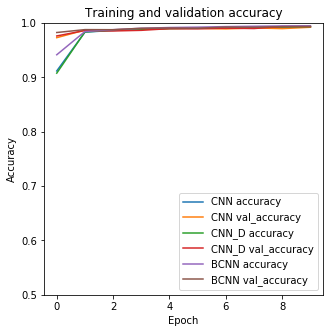

In [51]:
# Create train/validation Accuracy plot
#
plt.figure(figsize=(5, 5))
plt.plot(CNN_history.history["accuracy"], label= "CNN accuracy")
plt.plot(CNN_history.history["val_accuracy"], label = "CNN val_accuracy")
plt.plot(CNN_D_history.history["accuracy"], label= "CNN_D accuracy")
plt.plot(CNN_D_history.history["val_accuracy"], label = "CNN_D val_accuracy")
plt.plot(BCNN_history.history["accuracy"], label= "BCNN accuracy")
plt.plot(BCNN_history.history["val_accuracy"], label = "BCNN val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.title("Training and validation accuracy")
plt.legend(loc="lower right")


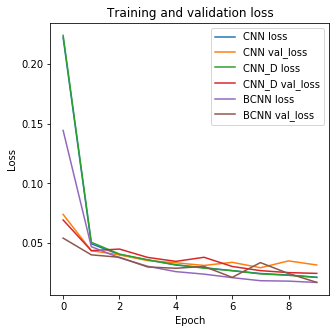

In [56]:
# Create train/validation Loss plot
#
plt.figure(figsize=(5, 5))
plt.plot(CNN_history.history["loss"], label= "CNN loss")
plt.plot(CNN_history.history["val_loss"], label= "CNN val_loss")
plt.plot(CNN_D_history.history["loss"], label= "CNN_D loss")
plt.plot(CNN_D_history.history["val_loss"], label= "CNN_D val_loss")
plt.plot(BCNN_history.history["loss"], label= "BCNN loss")
plt.plot(BCNN_history.history["val_loss"], label= "BCNN val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend(loc="upper right")

In [61]:
# BE AWARE OF THE LONG RUNNING TIME (RUN OVER NIGHT OR WITH GPU)
#  100 simulation runs (draws from the posterior distribution for each image)
# Passing in the same input 100 times, we get a different output for each run due to the MC dropout
#
BCNN_prob_stack = np.stack([BCNN.predict(X_test, verbose=1) for sample in range(100)])
BCNN_pred_stack = np.stack([np.argmax(BCNN.predict(X_test, verbose=1),axis=1) for sample in range(100)])

188/188 [==============================] - 24s 126ms/step


In [242]:
Trueclass_num =[]
for i in range(len(Test_label)):
    if Test_label[i]=='Negative':
        Trueclass_num.append(0)
    else:
        Trueclass_num.append(1)

# Confussion Matrices
y_actual = pd.Series(Trueclass_num, name='Actual')
#

print("BCNN p > 0.70")
BCNN_class= np.arange(len(BCNN_pred_stack[1,:]))
for i in range(len(BCNN_pred_stack[1,:])):
    BCNN_class[i]= np.where(np.mean(BCNN_prob_stack [:,i],0)[0] > 0.50 and  np.var(BCNN_prob_stack[:,i],0)[0] < 0.0009 , 0, 1)
y_predicted_bcnn  = pd.Series(BCNN_class, name='Predicted')
Confusion_M1= pd.crosstab(y_actual, y_predicted_bcnn, margins=True)
print(Confusion_M1)
#
print("CNN p > 0.70")
CNN_class =np.arange(len(CNN_pred))
for i in range(len(Test_label)):
    CNN_class[i] = np.where(CNN_prob[i,0] > 0.70, 0,1)
y_predicted_cnn  = pd.Series(CNN_class, name='Predicted')
Confusion_M2     = pd.crosstab(y_actual, y_predicted_cnn, margins=True)
print(Confusion_M2)
#
print("CNN_D p > 0.70")
CNN_D_class = np.arange(len(BCNN_pred))
for i in range(len(Test_label)):
    CNN_D_class[i] = np.where(CNN_D_prob[i,0] > 0.70, 0, 1)
y_predicted_cnn_d  = pd.Series(CNN_D_class, name='Predicted')
Confusion_M3    = pd.crosstab(y_actual, y_predicted_cnn_d, margins=True)
print(Confusion_M3)

BCNN p > 0.70
Predicted     0     1   All
Actual                     
0          2918    82  3000
1             2  2998  3000
All        2920  3080  6000
CNN p > 0.70
Predicted     0     1   All
Actual                     
0          2973    27  3000
1            12  2988  3000
All        2985  3015  6000
CNN_D p > 0.70
Predicted     0     1   All
Actual                     
0          2960    40  3000
1            11  2989  3000
All        2971  3029  6000


Text(0.5, 1.0, 'Predicted class CNN: Negative \nTrue class: Positive ')

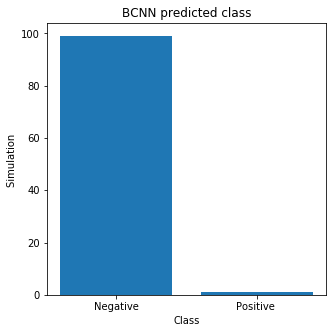

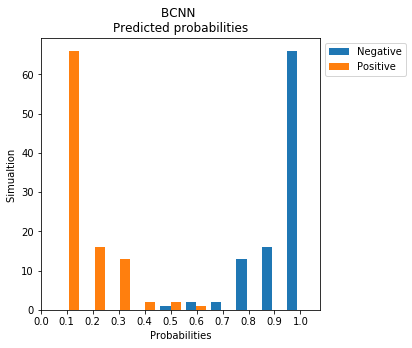

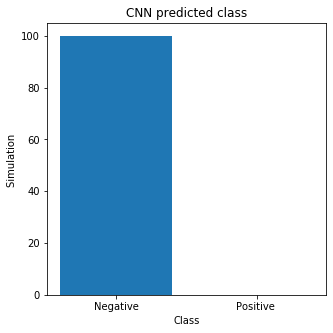

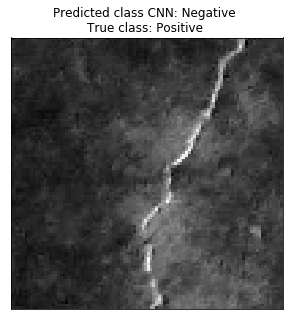

In [285]:
# Examples potential BCNN 
# 144
# CNN probability of negative class p = 0.92655724
names = ["Negative", "Positive "]
unique, counts = np.unique(BCNN_pred_stack[:,144], return_counts =True)
values = [99,1]
# Classes
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1,20.0))
plt.title("BCNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")
#. Probabilities
plt.figure(figsize=(5, 5))
plt.hist(BCNN_prob_stack[:,144],align = "right",)
plt.title("BCNN \nPredicted probabilities")
plt.xticks(np.arange(0,1+0.1,0.1))
plt.legend(["Negative", "Positive"],loc = 0 , bbox_to_anchor = (1,1))
plt.xlabel("Probabilities")
plt.ylabel("Simualtion ")

# CNN
# 
Nf = float("{0:.2f}".format(CNN_prob[144,0]))
Pf = float("{0:.2f}".format(CNN_prob[144,1]))
names = ["Negative", "Positive "]
values = [100,0]
# Classes
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1, 20.0))
plt.title("CNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")
# Image
plt.figure(figsize=(5, 5))
plt.imshow(X_test.squeeze()[144], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Predicted class CNN:{} \nTrue class: {} ".format(" Negative",Test_label[2312]))

Text(0.5, 1.0, 'Predicted class CNN: Negative \nTrue class: Positive ')

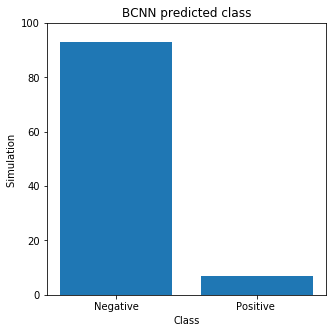

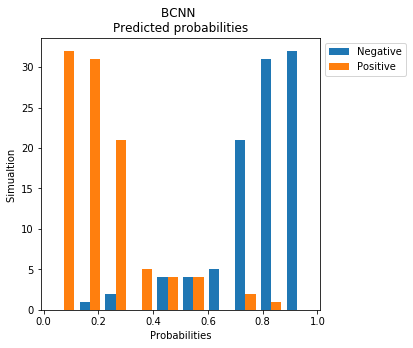

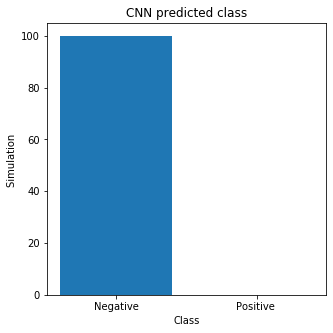

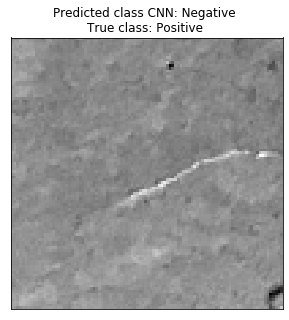

In [290]:
# Examples potential BCNN 
# 3712
# CNN probability of negative class p = 0.92655724
names = ["Negative", "Positive "]
unique, counts = np.unique(BCNN_pred_stack[:,3712], return_counts =True)
values = [93,7]
# Classes
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1,20.0))
plt.title("BCNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")
#. Probabilities
plt.figure(figsize=(5, 5))
plt.hist(BCNN_prob_stack[:,3712],align = "mid",)
plt.title("BCNN \nPredicted probabilities")
plt.xticks(np.arange(0,1+0.1,0.2))
plt.legend(["Negative", "Positive"],loc = 0 , bbox_to_anchor = (1,1))
plt.xlabel("Probabilities")
plt.ylabel("Simualtion ")

# CNN
# 
Nf = float("{0:.2f}".format(CNN_prob[2312,0]))
Pf = float("{0:.2f}".format(CNN_prob[2312,1]))
names = ["Negative", "Positive "]
values = [100,0]
# Classes
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1, 20.0))
plt.title("CNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")
# Image
plt.figure(figsize=(5, 5))
plt.imshow(X_test.squeeze()[3712], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Predicted class CNN:{} \nTrue class: {} ".format(" Negative",Test_label[2312]))



Text(0.5, 1.0, 'Predicted class CNN: Negative \nTrue class: Positive ')

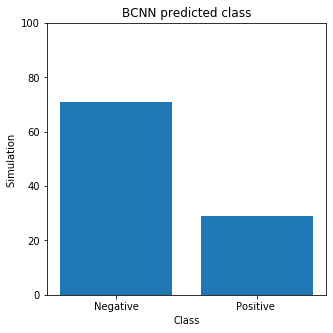

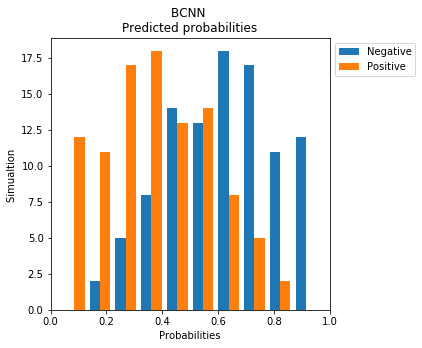

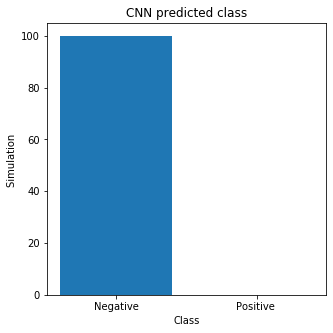

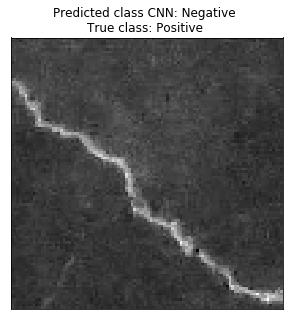

In [292]:
# Examples potential BCNN 
# 2312
# CNN probability of a negative class p = 0.7630167
names = ["Negative", "Positive "]
unique, counts = np.unique(BCNN_pred_stack[:,2312], return_counts =True)
values = [71,29]
# Classes
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1,20.0))
plt.title("BCNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")
#. Probabilities
plt.figure(figsize=(5, 5))
plt.hist(BCNN_prob_stack[:,2312],align = "mid",)
plt.title("BCNN \nPredicted probabilities")
plt.xticks(np.arange(0,1+0.1,0.2))
plt.legend(["Negative", "Positive"],loc = 0 , bbox_to_anchor = (1,1))
plt.xlabel("Probabilities")
plt.ylabel("Simualtion ")

# CNN
# 
Nf = float("{0:.2f}".format(CNN_prob[2312,0]))
Pf = float("{0:.2f}".format(CNN_prob[2312,1]))
names = ["Negative", "Positive "]
values = [100,0]
# Classes
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1, 20.0))
plt.title("CNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")
# Image
plt.figure(figsize=(5, 5))
plt.imshow(X_test.squeeze()[2312], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Predicted class CNN:{} \nTrue class: {} ".format(" Negative",Test_label[2312]))


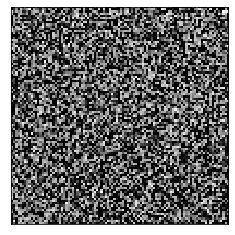

In [298]:
## EXTENSION ##
# Effect of random noise image
# Question: is the BCNN model able to detect the uncertainty for a random noise image?
# Download the random noise image at:https://github.com/Tasiabueno/Bayesian-Convolution-Neural-Network-Road-Crack-Detection/tree/master/Data
#
# Load the image
X_RandomNoise = cv2.imread("/Users/tasiabueno/Documents/Thesis/Data/X_RandomNoise.jpg", 0)
X_RandomNoise = cv2.resize(X_RandomNoise, (100,100))
# Plot the Random Noise in B/W
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(X_RandomNoise, cmap=plt.cm.binary)
# Tranform & Normalize Random Noise image 
X_RandomNoise = np.array(X_RandomNoise).reshape(-1,100,100,1)
X_RandomNoise = X_RandomNoise/225


In [300]:
# Run the CNN & BCNN on the RandomNois image (100 simualated prediction to obtain the draws from the posterior distribution
#
# Probabilities
RandomNoise_prob_CNN = np.stack([CNN.predict(X_RandomNoise, verbose=0) for sample in range(100)])
RandomNoise_prob_BCNN = np.stack([BCNN.predict(X_RandomNoise, verbose=0) for sample in range(100)])
# Classes
RandomNoise_pred_CNN = np.stack(np.argmax(CNN.predict(X_RandomNoise, verbose=0),axis=1) for sample in range(100))
RandomNoise_pred_BCNN = np.stack(np.argmax(BCNN.predict(X_RandomNoise, verbose=0),axis=1) for sample in range(100))



Text(0, 0.5, 'Simulation ')

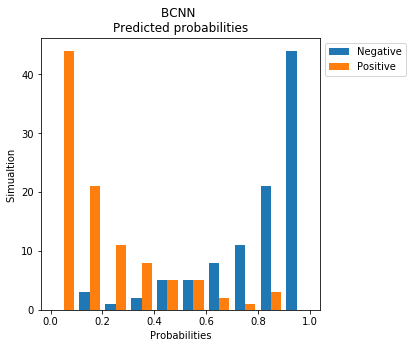

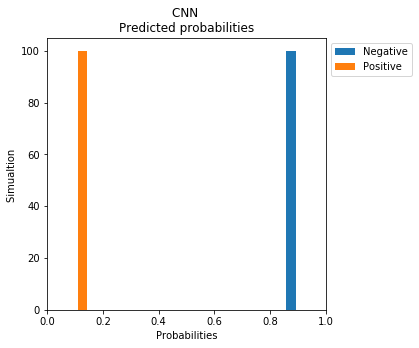

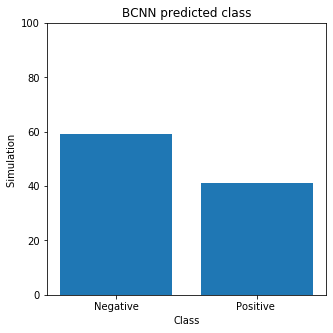

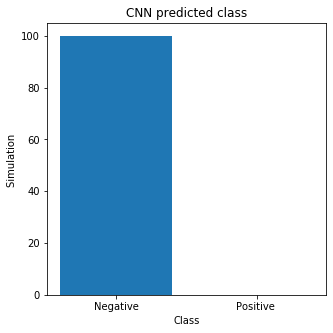

In [302]:
# Evaluate the results on the RandomNoise image
# Adversial image probabilities BCNN
plt.figure(figsize=(5, 5))
plt.hist(RandomNoise_prob_BCNN[:,0],align = "mid",)
plt.title("BCNN \nPredicted probabilities")
plt.xticks(np.arange(0,1+0.1,0.2))
plt.legend(["Negative", "Positive"],loc = 0 , bbox_to_anchor = (1,1))
plt.xlabel("Probabilities")
plt.ylabel("Simualtion ")
#Adversial image probabilities CNN
plt.figure(figsize=(5, 5))
plt.hist(RandomNoise_prob_CNN[:,0],align = "mid",)
plt.title("CNN \nPredicted probabilities")
plt.xticks(np.arange(0,1+0.1,0.2))
plt.legend(["Negative", "Positive"],loc = 0 , bbox_to_anchor = (1,1))
plt.xlabel("Probabilities")
plt.ylabel("Simualtion ")

# Adversial image classes BCNN
names = ["Negative", "Positive "]
unique, counts = np.unique(RandomNoise_pred_BCNN[:,0], return_counts =True)
values = [59,41]
plt.figure(figsize=(5, 5))
plt.bar(names,values)
plt.yticks(np.arange(0,100+1,20.0))
plt.title("BCNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")

#Adversial image classes CNN
plt.figure(figsize=(5, 5))
plt.bar(names,[100,0])
plt.yticks(np.arange(0,100+1,20.0))
plt.title("CNN predicted class")
plt.xlabel("Class")
plt.ylabel("Simulation ")


